## Gender-Based Account Mix Analysis in Retail Banking
---
This project explores customer account distribution across product types and genders to provide actionable insights for financial institutions. 
It leverages Python, pandas, and visualization libraries to uncover patterns and recommend strategies for growth and inclusion.

In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load the dataset from the CSV file

In [122]:
file_path = "E:/Data Science/Data Analysis/Business Intelligence (BI) Portfolio/deposit-mix-analysis/product_wise_ac_info.csv"
df = pd.read_csv(file_path)
df.head(20)

,PRODUCT_NATURE,PRODUCT_DESC,GENDER,PRODUCT_TYPE,TOTAL_ACCOUNTS
0,Current A/c,Current Account -Astha,Male,No Cost,1540
1,Current A/c,Personal Retail Account,Male,No Cost,21508
2,Current A/c,Personal Retail Account,Female,No Cost,1237
3,Current A/c,Agent Current Account,Female,No Cost,1064
4,Current A/c,Current Account -Astha,Female,No Cost,115
5,Current A/c,Agent Current Account,Others,No Cost,250
6,Current A/c,Current Account,Others,No Cost,30626
7,Current A/c,Institutional Current Account,Others,No Cost,260
8,Current A/c,Current Account,Male,No Cost,59660
9,Current A/c,Current Account,Female,No Cost,3810


### Data Cleaning
---
Remove any leading or trailing whitespace from the column names

In [124]:
df.columns = df.columns.str.strip()

### Analysis and Visualization
---
#### 1. Gender Distribution Analysis
Group data by gender and sum the total accounts for each gender

#### Create a bar chart for gender distribution

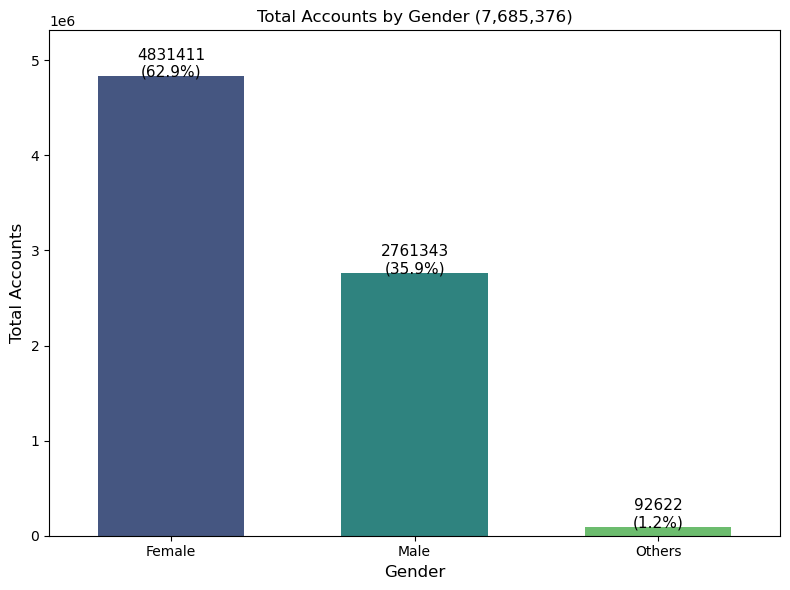

In [128]:
# Group by gender and sum the total accounts
gender_distribution = df.groupby('GENDER')['TOTAL_ACCOUNTS'].sum().reset_index()

# Sort for consistent bar order (optional)
gender_distribution = gender_distribution.sort_values(by='TOTAL_ACCOUNTS', ascending=False).reset_index(drop=True)

# Calculate total accounts
total_accounts = gender_distribution['TOTAL_ACCOUNTS'].sum()

# Create bar chart
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    x='GENDER',
    y='TOTAL_ACCOUNTS',
    data=gender_distribution,
    width=0.6,
    hue='GENDER',
    palette='viridis',
    legend=False  # Hide legend since gender is already on x-axis
)

plt.title(f'Total Accounts by Gender ({total_accounts:,})', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Total Accounts', fontsize=12)

# Add labels above bars
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_accounts) * 100
    annotation_text = f"{int(height)}\n({percentage:.1f}%)"
    
    ax.annotate(
        text=annotation_text,
        xy=(p.get_x() + p.get_width() / 2., height),
        ha='center',
        va='center',
        fontsize=11,
        color='black',
        xytext=(0, 9),  # 9 points above bar
        textcoords='offset points'
    )

# Optional: if text gets cut off at the top
plt.margins(y=0.1)
plt.tight_layout()
#plt.savefig('total_ac_gender.png')
plt.savefig(r'E:\Data Science\Data Analysis\Business Intelligence (BI) Portfolio\deposit-mix-analysis\images\total_ac_gender.png')
plt.show()

### Pie chart

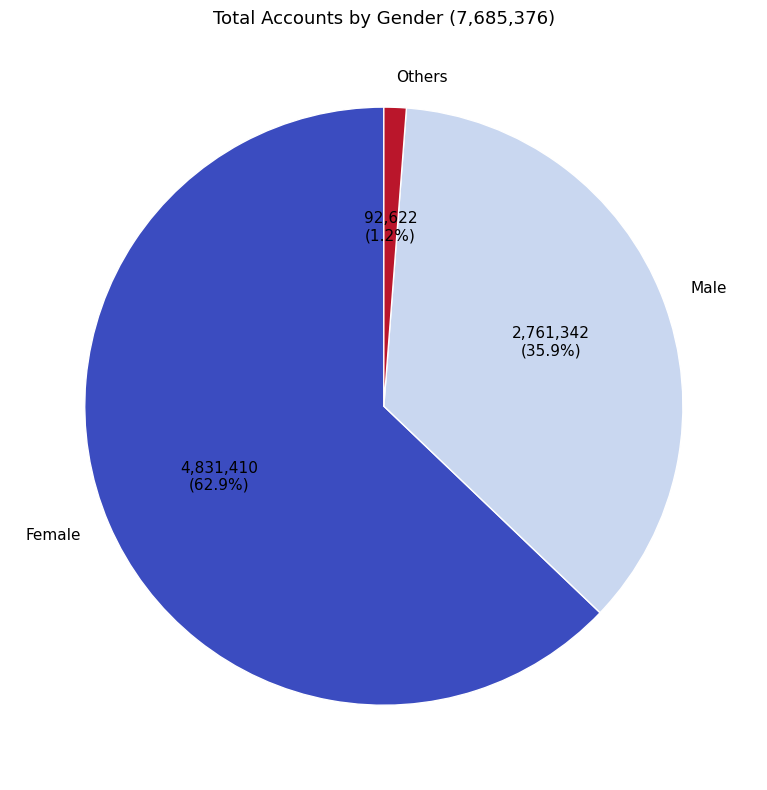

In [130]:
import matplotlib.pyplot as plt

# Group by gender and sum total accounts
gender_distribution = df.groupby('GENDER')['TOTAL_ACCOUNTS'].sum().reset_index()

# Sort (optional, for visual consistency)
gender_distribution = gender_distribution.sort_values(by='TOTAL_ACCOUNTS', ascending=False).reset_index(drop=True)

# Extract data for pie chart
labels = gender_distribution['GENDER']
sizes = gender_distribution['TOTAL_ACCOUNTS']
total_accounts = sizes.sum()

# Define color palette (optional: match original style or customize)
colors = plt.cm.coolwarm_r(sizes / max(sizes)) # viridis, plasma, magma, cividis, coolwarm, seismic, PİYG, twilight, hsv

# Plot pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct=lambda pct: f"{int(pct * total_accounts / 100):,}\n({pct:.1f}%)",
    startangle=90,
    textprops={'fontsize': 11, 'color': 'black'},
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)

plt.title(f'Total Accounts by Gender ({total_accounts:,})', fontsize=13)
plt.tight_layout()
plt.savefig(r'E:\Data Science\Data Analysis\Business Intelligence (BI) Portfolio\deposit-mix-analysis\images\total_ac_gender_pie.png')
plt.show()

### Donut Chart

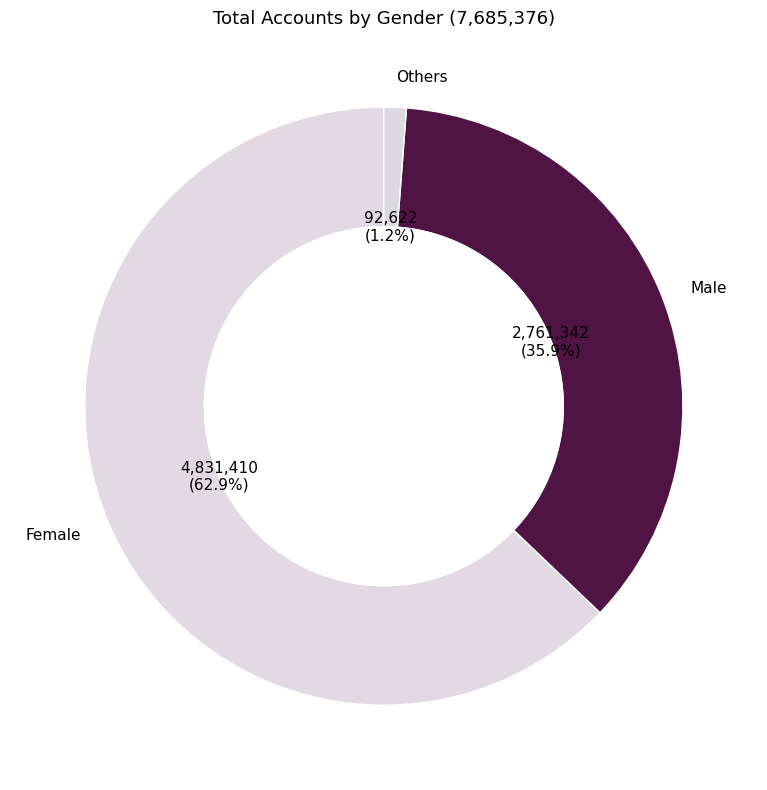

In [132]:
import matplotlib.pyplot as plt

# Group by gender and sum total accounts
gender_distribution = df.groupby('GENDER')['TOTAL_ACCOUNTS'].sum().reset_index()

# Sort (optional, for visual consistency)
gender_distribution = gender_distribution.sort_values(by='TOTAL_ACCOUNTS', ascending=False).reset_index(drop=True)

# Extract data for pie chart
labels = gender_distribution['GENDER']
sizes = gender_distribution['TOTAL_ACCOUNTS']
total_accounts = sizes.sum()

# Define color palette (optional: match original style or customize)
colors = plt.cm.twilight(sizes / max(sizes))

# Plot donut chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct=lambda pct: f"{int(pct * total_accounts / 100):,}\n({pct:.1f}%)",
    startangle=90,
    textprops={'fontsize': 11, 'color': 'black'},
    wedgeprops={'linewidth': 1, 'edgecolor': 'white', 'width': 0.4}  # <-- This makes it a donut
)

# Optional: Add a circle in the center for aesthetic
centre_circle = plt.Circle((0, 0), 0.6, color='white', fc='white')
plt.gca().add_artist(centre_circle)

plt.title(f'Total Accounts by Gender ({total_accounts:,})', fontsize=13)
plt.tight_layout()
plt.savefig(r'E:\Data Science\Data Analysis\Business Intelligence (BI) Portfolio\deposit-mix-analysis\images\total_ac_gender_donut.png')
plt.show()

### 2. Account Engagement by Gender

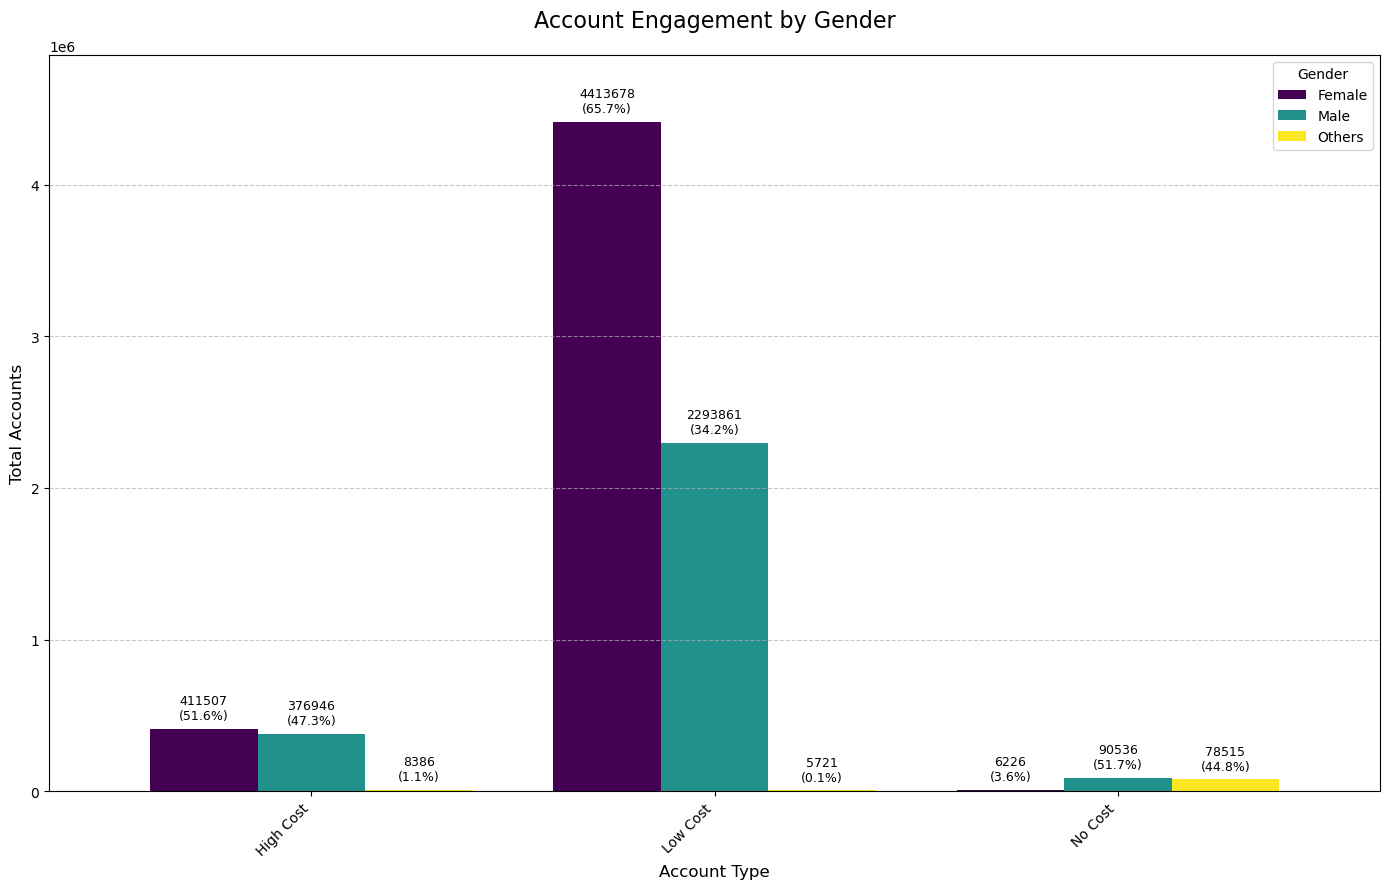

In [134]:
# Group data by product type and gender and sum the accounts
product_gender_distribution = df.groupby(['PRODUCT_TYPE', 'GENDER'])['TOTAL_ACCOUNTS'].sum().unstack().fillna(0)

# Create a grouped bar chart and get the Axes object
ax = product_gender_distribution.plot(kind='bar', stacked=False, figsize=(14, 9), colormap='viridis', width=0.8)

# --- Annotations ---

# Calculate total accounts for each product type to use for percentage calculation
product_totals = product_gender_distribution.sum(axis=1)

# Get the number of product types (groups on the x-axis)
num_products = len(product_gender_distribution.index)

# Iterate over each bar in the plot to add annotations
# We use enumerate to get both the index (i) and the patch (p)
for i, p in enumerate(ax.patches):
    # Get the height of the bar (the total accounts for that segment)
    height = p.get_height()
    
    # Skip annotating if the bar has no height
    if height <= 0:
        continue
    
    # The group index (which corresponds to the product type) is calculated based on the patch order.
    # Matplotlib plots all bars for the first gender, then all for the second, and so on.
    # Using the modulo operator with the number of products gives us the correct product index for any bar.
    group_index = i % num_products
    
    # Get the total for the corresponding product type using the correct index
    total_for_product = product_totals.iloc[group_index]
    
    # Calculate the percentage
    percentage = (height / total_for_product) * 100 if total_for_product > 0 else 0
    
    # Format the annotation string to show the count and percentage
    annotation_text = f"{int(height)}\n({percentage:.1f}%)"
    
    # Place the annotation on the bar
    ax.annotate(
        text=annotation_text,
        xy=(p.get_x() + p.get_width() / 2, height), # Position at the top center of the bar
        xytext=(0, 5),  # 5 points vertical offset to lift the text above the bar
        textcoords="offset points",
        ha='center',
        va='bottom',
        fontsize=9,
        color='black'
    )

# Formatting the plot
plt.title('Account Engagement by Gender', fontsize=16, pad=20)
plt.xlabel('Account Type', fontsize=12)
plt.ylabel('Total Accounts', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust the top margin to make space for annotations on the tallest bars
plt.margins(y=0.1)
plt.tight_layout() # Adjust layout to make room for labels

# Save the figure
#plt.savefig('deposit_engagement_by_gender.png')
plt.savefig(r'E:\Data Science\Data Analysis\Business Intelligence (BI) Portfolio\deposit-mix-analysis\images\deposit_engagement_by_gender.png')
# Display the plot
plt.show()

### 3. Deposit Distribution Analysis

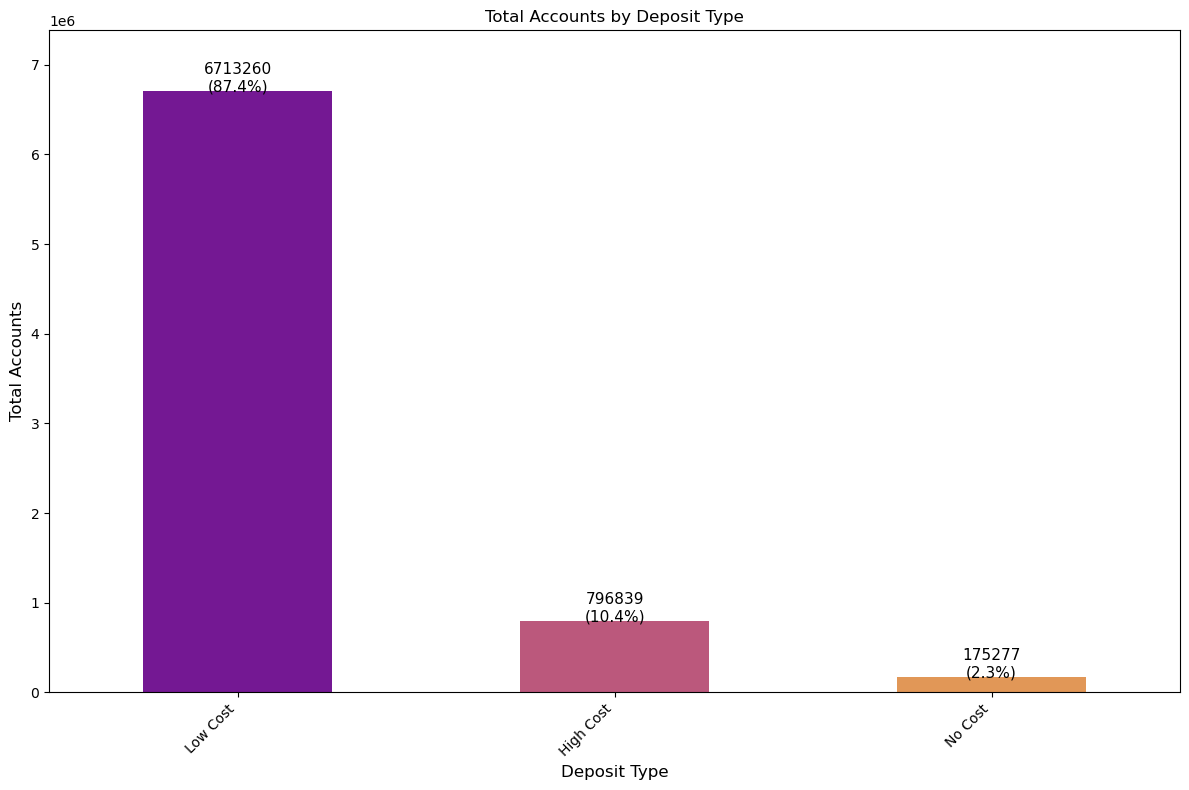

In [136]:
import numpy as np
# Group data by product type and get the sum of accounts, then sort in descending order
product_distribution = df.groupby('PRODUCT_TYPE')['TOTAL_ACCOUNTS'].sum().sort_values(ascending=False).reset_index()

# Create a bar chart for product type distribution
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='PRODUCT_TYPE', y='TOTAL_ACCOUNTS', data=product_distribution, width=0.5, hue='PRODUCT_TYPE', palette='plasma', legend=False)
plt.title('Total Accounts by Deposit Type', fontsize=12)
plt.xlabel('Deposit Type', fontsize=12)
plt.ylabel('Total Accounts', fontsize=12)
plt.xticks(rotation=45, ha='right')

# --- Code for percentage calculation and annotation ---

# Calculate the total number of accounts across all products
total_accounts_all_products = product_distribution['TOTAL_ACCOUNTS'].sum()

# Add labels to the bars with count and percentage
for p in ax.patches:
    height = p.get_height()
    
    # Calculate percentage
    percentage = (height / total_accounts_all_products) * 100
    
    # Format the annotation string
    annotation_text = f"{int(height)}\n({percentage:.1f}%)"
    
    # Place the annotation on the bar
    ax.annotate(
        text=annotation_text,
        xy=(p.get_x() + p.get_width() / 2., height),
        ha='center', 
        va='center',
        fontsize=11, 
        color='black',
        xytext=(0, 9), # Offset the text slightly above the bar
        textcoords='offset points'
    )

# Adjust plot margins to prevent labels from being cut off
plt.margins(y=0.1)
plt.tight_layout() # Adjust layout
#plt.savefig('total-ac-deposit-type.png')
plt.savefig(r'E:\Data Science\Data Analysis\Business Intelligence (BI) Portfolio\deposit-mix-analysis\images\total_ac_deposit_type.png')
plt.show()

### 4. Detailed analysis for "Close the Gender Gap" and "Segment Analysis"

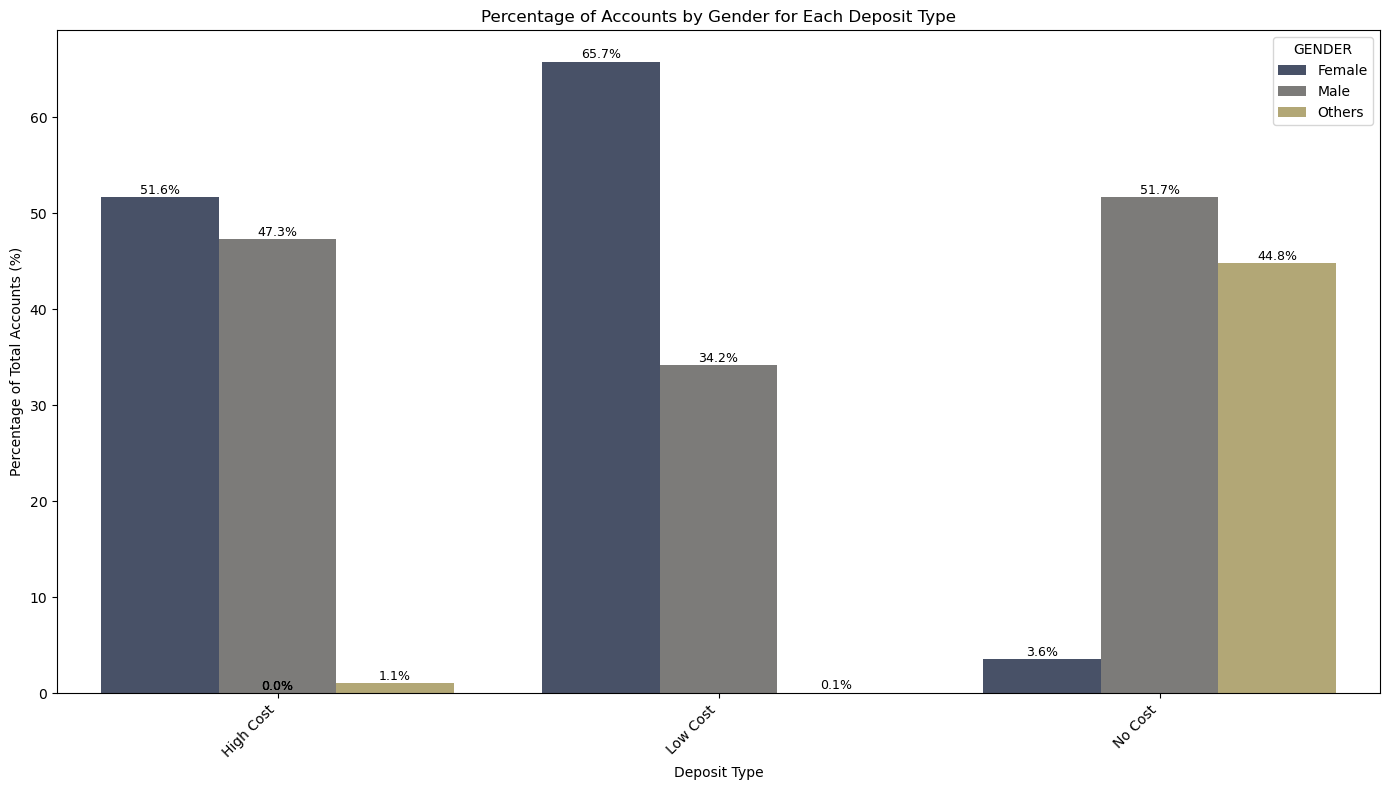

In [138]:
# Calculate the percentage of accounts for each gender within each product type
product_gender_percentage = df.groupby(['PRODUCT_TYPE', 'GENDER'])['TOTAL_ACCOUNTS'].sum().reset_index()
product_totals = df.groupby('PRODUCT_TYPE')['TOTAL_ACCOUNTS'].sum().reset_index()
product_gender_percentage = product_gender_percentage.merge(product_totals, on='PRODUCT_TYPE', suffixes=('', '_total'))
product_gender_percentage['percentage'] = (product_gender_percentage['TOTAL_ACCOUNTS'] / product_gender_percentage['TOTAL_ACCOUNTS_total']) * 100

# Create a bar chart showing the percentage breakdown
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='PRODUCT_TYPE', y='percentage', hue='GENDER', data=product_gender_percentage, palette='cividis') # viridis, plasma, magma, cividis, coolwarm, seismic, PİYG, twilight, hsv
plt.title('Percentage of Accounts by Gender for Each Deposit Type')
plt.xlabel('Deposit Type')
plt.ylabel('Percentage of Total Accounts (%)')
plt.xticks(rotation=45, ha='right')

# Add percentage labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout() # Adjust layout
#plt.savefig('gender_percentage_by_deposit.png')
plt.savefig(r'E:\Data Science\Data Analysis\Business Intelligence (BI) Portfolio\deposit-mix-analysis\images\gender_percentage_by_deposit.png')
plt.show()
#plt.clf() # Clear the current figure